# Chaining generators through pipelines

This tutorial shows how to chain different generators using the provided Pipeline class.

Beware, this pipeline class is not compatible with the sklearn Pipeline class

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs
from badgers.generators.tabular_data.noise import GaussianNoiseGenerator
from badgers.generators.tabular_data.imbalance import RandomSamplingClassesGenerator
from badgers.core.pipeline import Pipeline

## Setup random generator

In [3]:
from numpy.random import default_rng
seed = 0
rng = default_rng(seed)

## Load data

Here we simply genrate fake data using `make_blobs` from scikit-learn (see [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs))

In [4]:
# load data
X, y = make_blobs(centers=4, random_state=0, cluster_std=0.6)
X = pd.DataFrame(data=X, columns=['dimension_0', 'dimension_1'])
y = pd.Series(y)

## Chaining the generators

In [4]:
generators = {
    'imbalance': RandomSamplingClassesGenerator(random_generator=rng),
    'noise': GaussianNoiseGenerator(random_generator=rng)
}

pipeline = Pipeline(generators=generators)

Xt, yt = pipeline.generate(X.copy(),y=y,noise_std=0.5,proportion_classes={0:0.6, 1:0.25, 2:0.1, 3:0.05})

TypeError: Pipeline.generate() got an unexpected keyword argument 'noise_std'

## Visualization

Here is some code to visualize both the original and the transformed data

In [ ]:
Xt.head()

C:\Users\siebert\PycharmProjects\badgers\venv\Lib\site-packages\seaborn\_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


ValueError: Could not interpret value `dimension_0` for parameter `x`

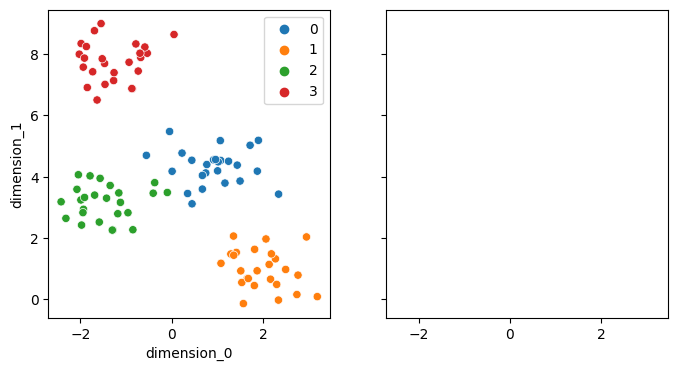

In [12]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))
sns.scatterplot(data=X, x='dimension_0', y='dimension_1', hue=y, palette=sns.color_palette("tab10")[:4], ax=axes[0])
sns.scatterplot(data=Xt, x='dimension_0', y='dimension_1', hue=yt, palette=sns.color_palette("tab10")[:4], ax=axes[1])

axes[0].set_title('Original')
axes[1].set_title('Transformed')

plt.tight_layout();

## Visualizing the number of instances for all classs

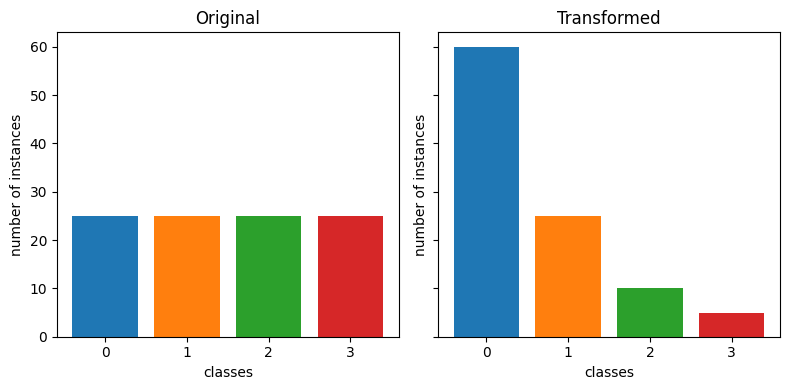

In [6]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))

classes, nb = np.unique(y, return_counts=True)
axes[0].bar(classes, nb, color=[f'C{i}' for i in range(len(classes))])
axes[0].set_xlabel('classes')
axes[0].set_ylabel('number of instances')

classes_t, nb_t = np.unique(yt, return_counts=True)
axes[1].bar(classes_t, nb_t, color=[f'C{i}' for i in range(len(classes_t))])
axes[1].set_xlabel('classes')
axes[1].set_ylabel('number of instances')

axes[0].set_title('Original')
axes[1].set_title('Transformed')
plt.tight_layout();